In [1]:
import pandas as pd
import re
df = pd.read_csv('essays_and_prompts.csv', sep=';')

In [14]:
from efficiency.nlp import Chatbot
import os
import openai
import pandas as pd
openai.api_key = os.environ["OPENAI_API_KEY"]


for index, row in df[66:].iterrows():
    query =  "Your task is to infuse grammatical errors and turn the input into broken english (e.g. missing words, wrong spelling, wrong tense).\n Input: " + row.essay_prompt_raw + "\nExample output:Yu agree or disagree wit th following statement? Peoples nev satisfy wit wht thy hav; thy alway want something mo or smething different. Use specific rezons to suport yur answer."

    response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {
        "role": "system",
        "content": "Your task is to make grammatical errors and turn the provided sentence into broken english."
        },
        {
        "role": "user",
        "content": query
        }
    ],
    temperature=1,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
    )
    print(index)
    print(response['choices'][0]['message']['content'])
    df.at[index,'prompt_with_errors_v2'] = response['choices'][0]['message']['content']
    df.to_csv('essay_prompts.csv', sep=';')


66
Wen students moves to new skool, they somestimes face problem. How skools can helps these studnts wit dem problem? Use specific reasons and examples to explain yur anser.
67
Every generations of people is difference in important way. How your generation different from your parents' generation? Use specific reasons and example to explaining your answer.
68
Some students likes classes where teacher speeches (do all of the talking) in class. Others students prefers classes where the students does some of the talking. Which kind of class do you prefer? Gives specific reasons and details to support your choosing.
69
Thuh twenty-oneth sentury has beguned. What changes duz yu think this new sentury wil brings? Use xamples and detalis in yur answer.
70
What are some qualities that a good parent? Use spesific details and examples too explain yur ansr.
71
In yur country, is there more need for land left in it's natural condition or is ther more need for land developed for house and industry? 

In [18]:
import os
import openai
import pandas as pd
openai.api_key = os.environ["OPENAI_API_KEY"]

instruction = "Your task is to write an essay (about 300-350 words) in response to a question. The topic will be provided by the user."

df = pd.read_csv('essay_prompts.csv', sep=';')

for index, row in df[163:].iterrows():
    response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {
        "role": "system",
        "content": instruction
        },
        {
        "role": "user",
        "content": row.prompt_with_errors_v2
        }
    ],
    temperature=1,
    max_tokens=500,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
    )
    print(index)
    #print(response['choices'][0]['message']['content'])
    df.at[index,'essay_from_prompt_with_errors_v2'] = response['choices'][0]['message']['content']
    df.to_csv('essay_prompts.csv', sep=';')


163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


In [10]:
linguistic sophistication. 
Text quality. 
Factuality. 
Grammatical mistakes.

essay prompt: How to show the socioeconomic / education quality of the person prompting?
- grammatical mistakes in prompt
- African American way of speaking? 
- ESL (english as second language) -> speakers show hints of their errors based on their mother language
- 


Heatmap of correlation 
x-axis: length, number of grammatical mistakes

In [5]:
import textstat
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import language_tool_python 
import statistics

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def analyze_essay(essay):
    """
    Analyze various aspects of an essay for linguistic sophistication.

    :param essay: A string containing the essay text.
    :return: A dictionary with various metrics and an overall quality score.
    """
    
    #lt = language_tool_python.LanguageToolPublicAPI('en-US')

    # Readability and complexity metrics
    flesch_reading_ease = textstat.flesch_reading_ease(essay)
    smog_index = textstat.smog_index(essay)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(essay)

    # Tokenize essay into words and sentences
    words = word_tokenize(essay)
    sentences = sent_tokenize(essay)
    unique_words = len(set(words))

    # Lexical diversity
    lexical_diversity = len(set(words)) / len(words) if words else 0

    # Sentence length variability
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    sentence_length_variability = statistics.stdev(sentence_lengths) if len(sentence_lengths) > 1 else 0

    # Grammatical mistakes
    #matches = lt.check(essay)
    #grammar_errors = len(matches) 
    grammar_errors = 0

    # Complexity of sentence structures (using POS tagging)
    pos_tags = [pos for word, pos in nltk.pos_tag(words)]
    complex_structures = pos_tags.count('JJ') + pos_tags.count('NNP') + pos_tags.count('VBD')

    # Calculate overall quality score (example formula, can be customized)
    overall_quality = (
        (flesch_reading_ease + 100 - smog_index + 100 - flesch_kincaid_grade) +
        (lexical_diversity * 100 + unique_words * 0.5) - 
        (grammar_errors + sentence_length_variability - complex_structures)
    ) / 8
    return   {
        "flesch_reading_ease": flesch_reading_ease,
        "smog_index": smog_index,
        "flesch_kincaid_grade": flesch_kincaid_grade,
        "unique_words": unique_words,
        "lexical_diversity": lexical_diversity,
        "sentence_length_variability": sentence_length_variability,
        "grammar_errors": grammar_errors,
        "complex_structures": complex_structures,
        "overall_quality": overall_quality
    }
 #overall_quality

# Load essays
#essay1 = data.iloc[7, 5]
#essay2 = data.iloc[7, 6]

#linguistic sophistication
#results1 = analyze_essay(essay1)
#results2 = analyze_essay(essay2)
#print(results1)
#print(results2)

df['metrics_essay_base'] = df['essay_base'].apply(analyze_essay)
df['metrics_essay_errors'] = df['essay_from_error_prompt'].apply(analyze_essay)
df['metrics_essay_AAE'] = df['essay_from_AAE_prompt'].apply(analyze_essay)
df['metrics_essay_errors_v2'] = df['essay_from_prompt_with_errors_v2'].apply(analyze_essay)


[nltk_data] Downloading package punkt to /Users/nils/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nils/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/nils/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


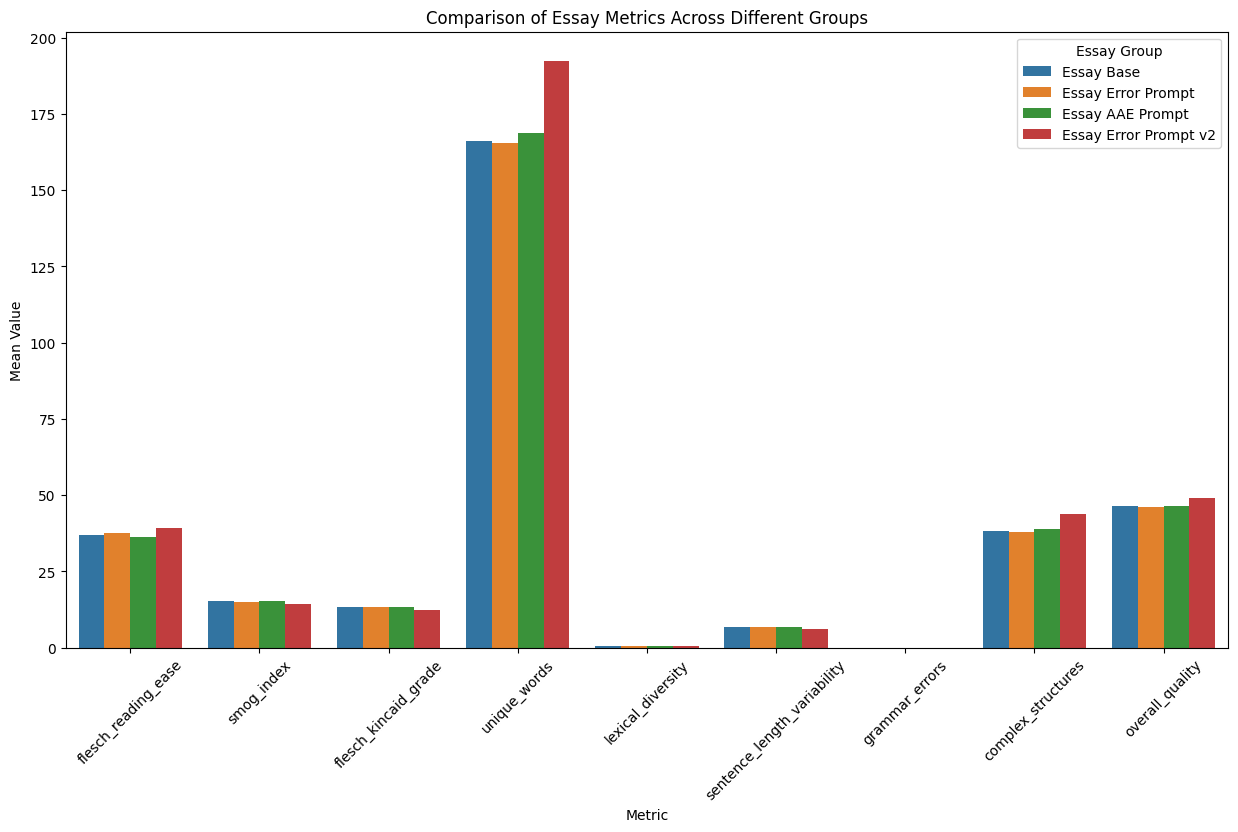

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert dictionaries to DataFrame
df_essay_base = pd.DataFrame(list(df['metrics_essay_base']))
df_essay_error_prompt = pd.DataFrame(list(df['metrics_essay_errors']))
df_essay_aae_prompt = pd.DataFrame(list(df['metrics_essay_AAE']))
df_essay_error_prompt_v2 = pd.DataFrame(list(df['metrics_essay_errors_v2']))



# Calculate means
means_essay_base = df_essay_base.mean()
means_essay_error_prompt = df_essay_error_prompt.mean()
means_essay_aae_prompt = df_essay_aae_prompt.mean()
means_essay_error_prompt_v2 = df_essay_error_prompt_v2.mean()



# Prepare data for visualization
mean_data = pd.DataFrame({
    'Metric': means_essay_base.index,
    'Essay Base': means_essay_base.values,
    'Essay Error Prompt': means_essay_error_prompt.values,
    'Essay AAE Prompt': means_essay_aae_prompt.values,
    'Essay Error Prompt v2': means_essay_error_prompt_v2
})

# Visualization
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(mean_data, ['Metric']))
plt.xticks(rotation=45)
plt.title('Comparison of Essay Metrics Across Different Groups')
plt.ylabel('Mean Value')
plt.xlabel('Metric')
plt.legend(title='Essay Group')
plt.show()

In [ ]:
# flesch_reading_ease --> high = better
# smog_index --> low = better
# flesch_kincaid_grade --> low = better
# lexical_diversity * 100 --> high = better 
# unique_words * 0.5 --> high = better 
# grammar_errors --> low = better
# sentence_length_variability --> high or low better ??
# complex_structures --> high or low better ?? 
# overall quality --> high = better